In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import glob
import cv2
import numpy as np

x_train = []
x_test = []
y_train = []

dem = 0
for imgpath in glob.glob('/content/drive/MyDrive/Colab Notebooks/Anh_ANN/Nhom3Nguoi/*.bmp'):
  n = cv2.imread(imgpath)
  if dem%10 == 0:
    x_test.append(n)
  else:
    x_train.append(n)
  name1 = 'BanHung_'
  name2 = 'BanThinh_'
  name3 = 'BanTuan_'
  if name1 in imgpath:
    y_train.append([0])
  elif name2 in imgpath:
    y_train.append([1])
  elif name3 in imgpath:
    y_train.append([2])
  dem += 1
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)

# y_train, y_test là output (như đánh label cho ảnh x_train, x_test á)
# y_train, y_test chỉ được đánh số từ 0 cho các đối tượng (output): VD Thinh đánh số 0, Hung số 1, Tuan số 2

y_test = []
i = 0
while x_train.shape[0] < y_train.shape[0]:
  y_test.append(y_train[i])
  y_train = np.delete(y_train, i)
  i += 9
y_test = np.array(y_test)
y_train = list(y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


2


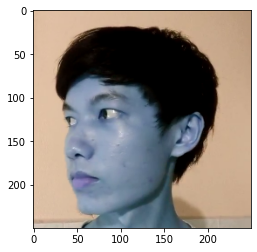

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1])
print(y_test[1])

In [6]:
from keras.utils.np_utils import to_categorical

# Chuyen don vi mau thanh so thuc
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Chuyen anh trang den
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [7]:
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(250,250,3)))  # 32: số lần dùng bộ lọc (filter - mảng 3x3)
                                                                                                                         # kernel_initializer='he_uniform': setup bộ lọc ban đầu với dạng he_uni...
                                                                                                                         # padding='same': để khi pad mảng filter ảnh sẽ ko bị thay đổi kích thước.
model.add(MaxPooling2D((2,2)))                                                                                                                         

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))  # 32: số lần dùng bộ lọc (filter - mảng 3x3)
                                                                                                                         # kernel_initializer='he_uniform': setup bộ lọc ban đầu với dạng he_uni...
                                                                                                                         # padding='same': để khi pad mảng filter ảnh sẽ ko bị thay đổi kích thước.
model.add(MaxPooling2D((2,2)))                                                                                                                         

model = Sequential()
model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))  # 32: số lần dùng bộ lọc (filter - mảng 3x3)
                                                                                                                         # kernel_initializer='he_uniform': setup bộ lọc ban đầu với dạng he_uni...
                                                                                                                         # padding='same': để khi pad mảng filter ảnh sẽ ko bị thay đổi kích thước.
model.add(MaxPooling2D((2,2)))          

In [8]:
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))  # Dense: full-connected (tất cả các tế bào thần kinh đều kết nối với nhau)
model.add(Dense(3, activation='softmax'))
opt = SGD(lr=0.01, momentum=0.9)  # lr: learning rate: tốc độ học, momentum: momen động lượng, sự dao động
# Biên dịch
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics='accuracy')
# Training
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


5/5 [==============================] - 45s 8s/step - loss: 1220.4956 - accuracy: 0.4306 - val_loss: 14.5988 - val_accuracy: 0.2424
Epoch 2/10
5/5 [==============================] - 36s 7s/step - loss: 3.9303 - accuracy: 0.5938 - val_loss: 0.8695 - val_accuracy: 0.7576
Epoch 3/10
5/5 [==============================] - 40s 8s/step - loss: 0.7421 - accuracy: 0.7882 - val_loss: 0.5187 - val_accuracy: 0.9697
Epoch 4/10
5/5 [==============================] - 40s 8s/step - loss: 0.3798 - accuracy: 0.9618 - val_loss: 0.1942 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 41s 8s/step - loss: 0.0982 - accuracy: 1.0000 - val_loss: 0.0296 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 40s 8s/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 39s 8s/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 8/10
5/5 [=========================

[[0.23650576 0.76228154 0.00121263]]


array([1])

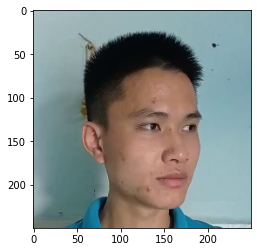

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('BanHung_000.jpg', target_size=(250,250))  
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,250,250,3)
img = img.astype('float32')
img /= 255
print(model.predict(img))
np.argmax(model.predict(img), axis=1)

[[8.7010544e-03 9.9054903e-01 7.4992183e-04]]


array([1])

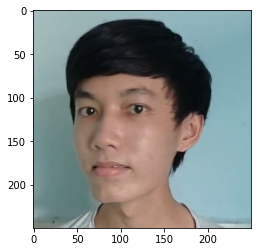

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('BanTuan_111.jpg', target_size=(250,250))  
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,250,250,3)
img = img.astype('float32')
img /= 255
print(model.predict(img))
np.argmax(model.predict(img), axis=1)

[[0.769847   0.10070942 0.12944365]]


array([0])

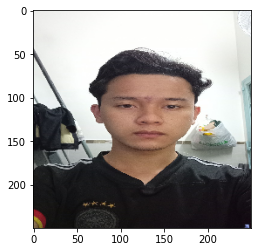

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('BanThinh_222.jpg', target_size=(250,250))  
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,250,250,3)
img = img.astype('float32')
img /= 255
print(model.predict(img))
np.argmax(model.predict(img), axis=1)

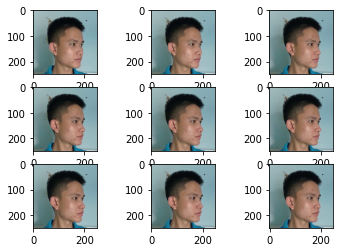

In [17]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

folder= '/content/drive/MyDrive/Colab Notebooks/Anh_ANN/Nhom3Nguoi/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'BanHung_ 10'+str(i + 1)+'.bmp'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [19]:
folder = '/content/drive/MyDrive/Colab Notebooks/Anh_ANN/Nhom3Nguoi/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('BanHung'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanTuan'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('BanThinh'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10foods_photos.npy', photos)
save('10foods_labels.npy', labels)

(435, 150, 150, 3) (435,)


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

#Biên dịch
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Training
history = model.fit(photos, labels, epochs= 20, verbose=1)

Epoch 1/20
14/14 [==============================] - 22s 2s/step - loss: 807.0287 - accuracy: 0.5218
Epoch 2/20
14/14 [==============================] - 22s 2s/step - loss: 2.4706 - accuracy: 0.9264
Epoch 3/20
14/14 [==============================] - 21s 1s/step - loss: 0.1334 - accuracy: 0.9931
Epoch 4/20
14/14 [==============================] - 21s 2s/step - loss: 7.3718e-08 - accuracy: 1.0000
Epoch 5/20
14/14 [==============================] - 22s 2s/step - loss: 2.7404e-10 - accuracy: 1.0000
Epoch 6/20
14/14 [==============================] - 30s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/20
14/14 [==============================] - 26s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
14/14 [==============================] - 22s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
14/14 [==============================] - 22s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/20
14/14 [==============================] - 21s 1s/step - loss: 0.0000e+00 - accura

In [21]:
model.save('CNN_NhanDienKhuonMat3Nguoi.h5')

In [22]:
classes = ["BanHung", "BanTuan", "BanThinh"]

[[0.44131824 0.22752833 0.33115348]]


'BanHung'

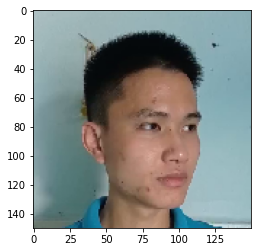

In [23]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np
img = load_img('BanHung_000.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255
y_pred = model.predict(img)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.35402298 0.23485628 0.41112065]]


'BanThinh'

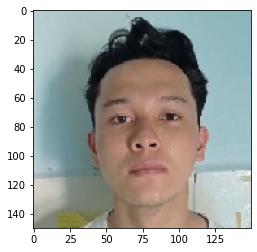

In [27]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np
img = load_img('BanThinh_111.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255
y_pred = model.predict(img)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.15947871 0.7290565  0.11146479]]


'BanTuan'

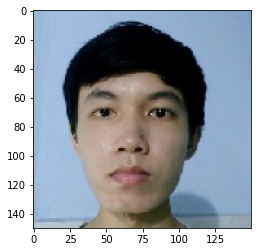

In [25]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np
img = load_img('BanTuan_000.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255
y_pred = model.predict(img)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.22920758 0.5134134  0.25737897]]


'BanTuan'

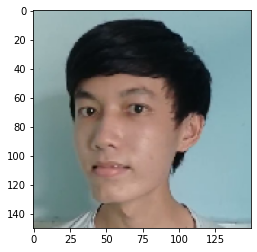

In [26]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
import numpy as np
img = load_img('BanTuan_111.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255
y_pred = model.predict(img)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]